In [1]:
## Here we will be learning the Hyperparameter Tunning of Adaboost

## Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles # To create own Dataset

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df1 = df[['pclass', 'sex', 'survived']] ## Seperating the dataset
df1.head()

,pclass,sex,survived
0,3,male,0
1,1,female,1
2,3,female,1
3,1,female,1
4,3,male,0


In [9]:
df1.pclass.value_counts() ## Checking the value count

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
df1.pclass[df1.pclass==2] = 1 # Changing the class '2' to class '1'

In [11]:
df1.pclass.value_counts() ## Checking the Result

pclass
3    491
1    400
Name: count, dtype: int64

In [12]:
df1.sex = df1.sex.map({'male':1, 'female':0}) ## Label Encoding 

In [13]:
df1.head()

,pclass,sex,survived
0,3,1,0
1,1,0,1
2,3,0,1
3,1,0,1
4,3,1,0


In [14]:
## Splitting the dataset

x = df1.iloc[:,0:2].values
y = df1.iloc[:,-1].values

In [15]:
## Initiailizing Adaboost Object

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

ada = AdaBoostClassifier(random_state=32) ## Using with default values
ada.fit(x,y)
np.mean(cross_val_score(ada,x,y,scoring='accuracy', cv=10))

0.786729088639201

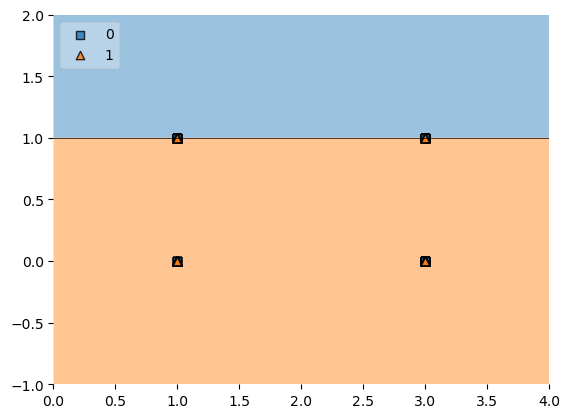

In [16]:
plot_decision_regions(x,y, clf=ada, legend=2)
plt.show()

In [17]:
## Using Adaboost with Hyperparamenter values

ada1= AdaBoostClassifier(n_estimators=1000, learning_rate=0.01,random_state=32)
ada1.fit(x,y)
np.mean(cross_val_score(ada1,x,y,scoring='accuracy', cv=10))

0.786729088639201

<AxesSubplot:>

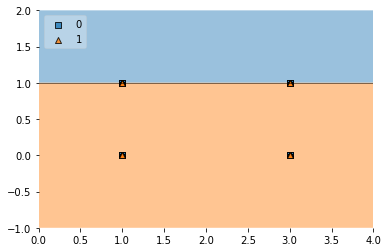

In [15]:
plot_decision_regions(x,y,clf=ada1, legend=2)

In [16]:
## Lastly we can use Grid Search CV to find the optimumu value

from sklearn.model_selection import GridSearchCV

param = {'n_estimators' :[10,50,100,300,500,700,1000],
        'learning_rate' : [0.0001,0.001, 0.01,0.1,1.0],
        'algorithm':['SAMME', 'SAMME.R']}

grid = GridSearchCV(AdaBoostClassifier(), param_grid=param, cv= 10, scoring='accuracy',verbose=True,
                   n_jobs=-1)

## Execute Grid Search

grid_result = grid.fit(x,y)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


In [17]:
## Summarizing the Best Score and Best paramerts

print(f'Best Accurracy Score is {grid_result.best_score_} using {grid_result.best_params_} paramaters')

Best Accurracy Score is 0.786729088639201 using {'algorithm': 'SAMME', 'learning_rate': 0.0001, 'n_estimators': 10} paramaters


In [ ]:
## So this is how we get the best results